## Problem Statement 1

In [49]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sn
%matplotlib inline
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
pd.set_option('display.max_columns', None)
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
df = pd.read_csv("C:\\Users\\hp\\Desktop\\New folder (2)\\softsensor ai\\Data_problem _1.csv")

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# check NAN value 

In [5]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

# fill nan value with meadian value

In [6]:
df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].median(),inplace = True)
df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].median(),inplace = True)

In [7]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## Advanced data preparation: Build an ‘enriched’ customer profile by deriving “intelligent” KPIs such as:

### a)Monthly average purchase and cash advance amount

In [8]:
df['Monthly_avg_purchase'] = df['PURCHASES']/df["TENURE"]
print(df.Monthly_avg_purchase.head())
print(df.PURCHASES.head())
print(df.TENURE.head())

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Monthly_avg_purchase, dtype: float64
0      95.40
1       0.00
2     773.17
3    1499.00
4      16.00
Name: PURCHASES, dtype: float64
0    12
1    12
2    12
3    12
4    12
Name: TENURE, dtype: int64


In [9]:
df["Monthly_cash_advance"] = df["CASH_ADVANCE"]/df["TENURE"]
df.Monthly_cash_advance.head()

0      0.000000
1    536.912124
2      0.000000
3     17.149001
4      0.000000
Name: Monthly_cash_advance, dtype: float64

### b)Purchases by type (one-off, installments)

In [10]:
df.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']]

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.40
1,0.00,0.00
2,773.17,0.00
3,1499.00,0.00
4,16.00,0.00
...,...,...
8945,0.00,291.12
8946,0.00,300.00
8947,0.00,144.40
8948,0.00,0.00


In [11]:
def purchage_category(df):
    if (df.ONEOFF_PURCHASES ==0)  & (df.INSTALLMENTS_PURCHASES ==0):
        return 'None'
    elif (df.ONEOFF_PURCHASES >0)  & (df.INSTALLMENTS_PURCHASES >0):
        return 'both_oneoff_installment'
    elif (df.ONEOFF_PURCHASES ==0)  & (df.INSTALLMENTS_PURCHASES >0):
        return 'installment'
    elif (df.ONEOFF_PURCHASES >0)  & (df.INSTALLMENTS_PURCHASES ==0):
        return 'one_off'

In [12]:
df['Purchase_type'] = df.apply(purchage_category,axis=1)
df.Purchase_type.value_counts()

both_oneoff_installment    2774
installment                2260
None                       2042
one_off                    1874
Name: Purchase_type, dtype: int64

### d) Limit usage (balance to credit limit ratio),

In [13]:
df['limit_uses'] = df['BALANCE']/df['CREDIT_LIMIT']

In [14]:
df.limit_uses.head()

0    0.040901
1    0.457495
2    0.332687
3    0.222223
4    0.681429
Name: limit_uses, dtype: float64

### e) Payments to minimum payments ratio etc. (think of more types of similar analysis)

In [15]:
df["payment_minimum_pay"] = df.apply(lambda x:x['PAYMENTS']/x['MINIMUM_PAYMENTS'],axis=1)

In [16]:
df.payment_minimum_pay.head()

0    1.446508
1    3.826241
2    0.991682
3    0.000000
4    2.771075
Name: payment_minimum_pay, dtype: float64

### Identify Categorical and continous variables

In [17]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [18]:
# we have 2 object datatype and remains all are in numerical
p = df.dtypes
column_name = ((p.keys())) 
numeric_var_names =  [i for i in column_name if i not in ['CUST_ID','Purchase_type']]
cat_var_names = ['CUST_ID','Purchase_type']
print(numeric_var_names)
print(cat_var_names)


['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'Monthly_avg_purchase', 'Monthly_cash_advance', 'limit_uses', 'payment_minimum_pay']
['CUST_ID', 'Purchase_type']


## Extreme value Treatment
### Since there are variables having extreme values so I am doing log-transformation on the dataset to remove outlier effect

In [19]:
# log tranformation
df_log=df.drop(['CUST_ID','Purchase_type'],axis=1).applymap(lambda x: np.log(x+1))
df_log.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_uses,payment_minimum_pay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,...,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,6.161637,0.619940,4.899647,3.204274,3.352403,3.319086,0.361268,0.158699,0.270072,0.113512,...,1.894731,8.094825,6.624540,5.916079,0.117730,2.519680,3.050877,2.163970,0.296081,1.357600
std,2.013303,0.148590,2.916872,3.246365,3.082973,3.566298,0.277317,0.216672,0.281852,0.156716,...,1.373856,0.819629,1.591763,1.169929,0.211617,0.130367,2.002823,2.429741,0.250303,0.940149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.931826,0.000000,0.018982,0.000000,1.945910,0.000000,0.000000,0.000000,0.000000
25%,4.861995,0.635989,3.704627,0.000000,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,...,0.693147,7.378384,5.951361,5.146667,0.000000,2.564949,1.481458,0.000000,0.040656,0.648817
50%,6.773521,0.693147,5.892417,3.663562,4.499810,0.000000,0.405465,0.080042,0.154151,0.000000,...,2.079442,8.006701,6.754489,5.747301,0.000000,2.564949,3.494587,0.000000,0.264455,1.109459
75%,7.628099,0.693147,7.013133,6.360274,6.151961,7.016449,0.650588,0.262364,0.559616,0.200671,...,2.890372,8.779711,7.550732,6.671670,0.133531,2.564949,4.587295,4.606022,0.540911,1.953415
max,9.854515,0.693147,10.800403,10.615512,10.021315,10.760839,0.693147,0.693147,0.693147,0.916291,...,5.883322,10.308986,10.834125,11.243832,0.693147,2.564949,8.315721,8.276166,2.827902,8.830767


## Insights from KPIs
### Average payment_minimum_pay ratio for each purchse type.

In [20]:
x=df.groupby('Purchase_type').apply(lambda x: np.mean(x['payment_minimum_pay']))
x

Purchase_type
None                       10.087451
both_oneoff_installment     7.236982
installment                13.259004
one_off                     5.571082
dtype: float64

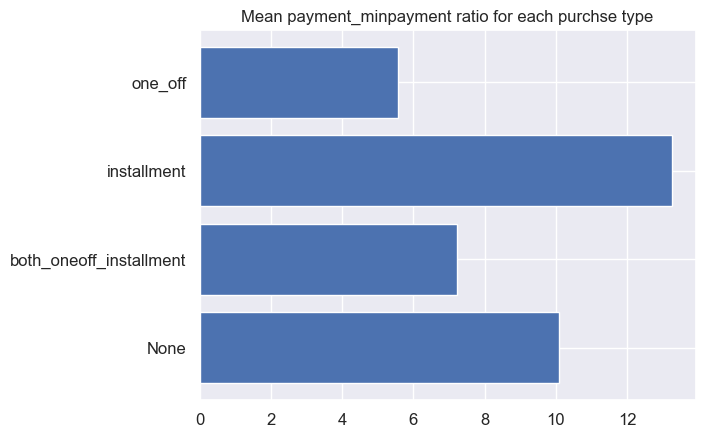

In [51]:
fig,ax=plt.subplots()
ax.barh(y=range(len(x)), width=x.values,align='center')
ax.set(yticks= np.arange(len(x)),yticklabels = x.index)
plt.title('Mean payment_minpayment ratio for each purchse type')
plt.show()

In [22]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_uses,payment_minimum_pay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,...,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,...,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318,86.175173,88.977984,0.388884,9.059164
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,...,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331,180.508787,193.136115,0.389722,118.180526
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,...,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000,3.399375,0.000000,0.041494,0.913275
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,...,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000,31.936667,0.000000,0.302720,2.032717
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,...,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000,97.228333,99.085196,0.717571,6.052729
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,...,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,4086.630833,3928.100980,15.909951,6840.528861


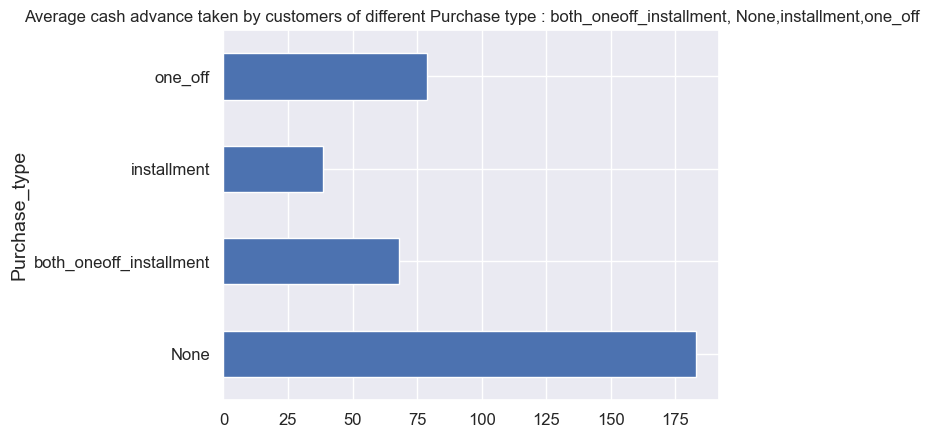

In [52]:
df.groupby('Purchase_type').apply(lambda x: np.mean(x['Monthly_cash_advance'])).plot.barh()
plt.title('Average cash advance taken by customers of different Purchase type : both_oneoff_installment, None,installment,one_off')
plt.show()

### Customers who don't do either one-off or installment purchases take more cash on advance

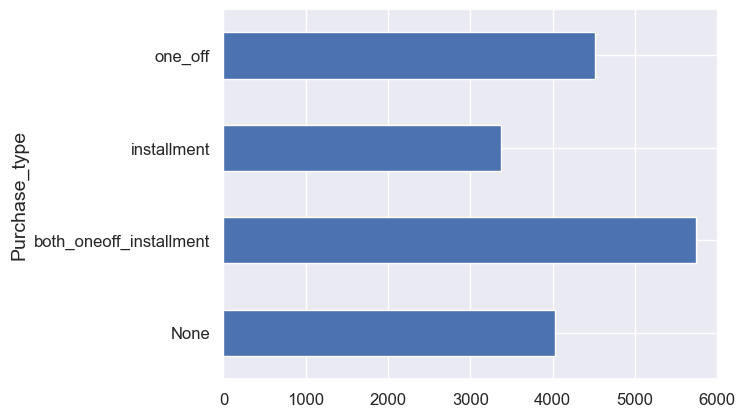

In [46]:
df.groupby('Purchase_type').apply(lambda x: np.mean(x['CREDIT_LIMIT'])).plot.barh()
plt.show()

## Original dataset with categorical column converted to number type.

In [55]:
df_final=pd.concat([df,pd.get_dummies(df['Purchase_type'])],axis=1)

In [59]:
df_final=df_final.drop(['CUST_ID','Purchase_type'],axis=1)
df_final.isnull().any()

BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
Monthly_avg_purchase                False
Monthly_cash_advance                False
limit_uses                          False
payment_minimum_pay                 False
None                                False
both_oneoff_installment             False
installment                       

In [60]:
df_final.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_uses,payment_minimum_pay,None,both_oneoff_installment,installment,one_off
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,0.040901,1.446508,0,0,1,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,0.457495,3.826241,1,0,0,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,0.332687,0.991682,0,0,0,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,124.916667,17.149001,0.222223,0.000000,0,0,0,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,0.681429,2.771075,0,0,0,1


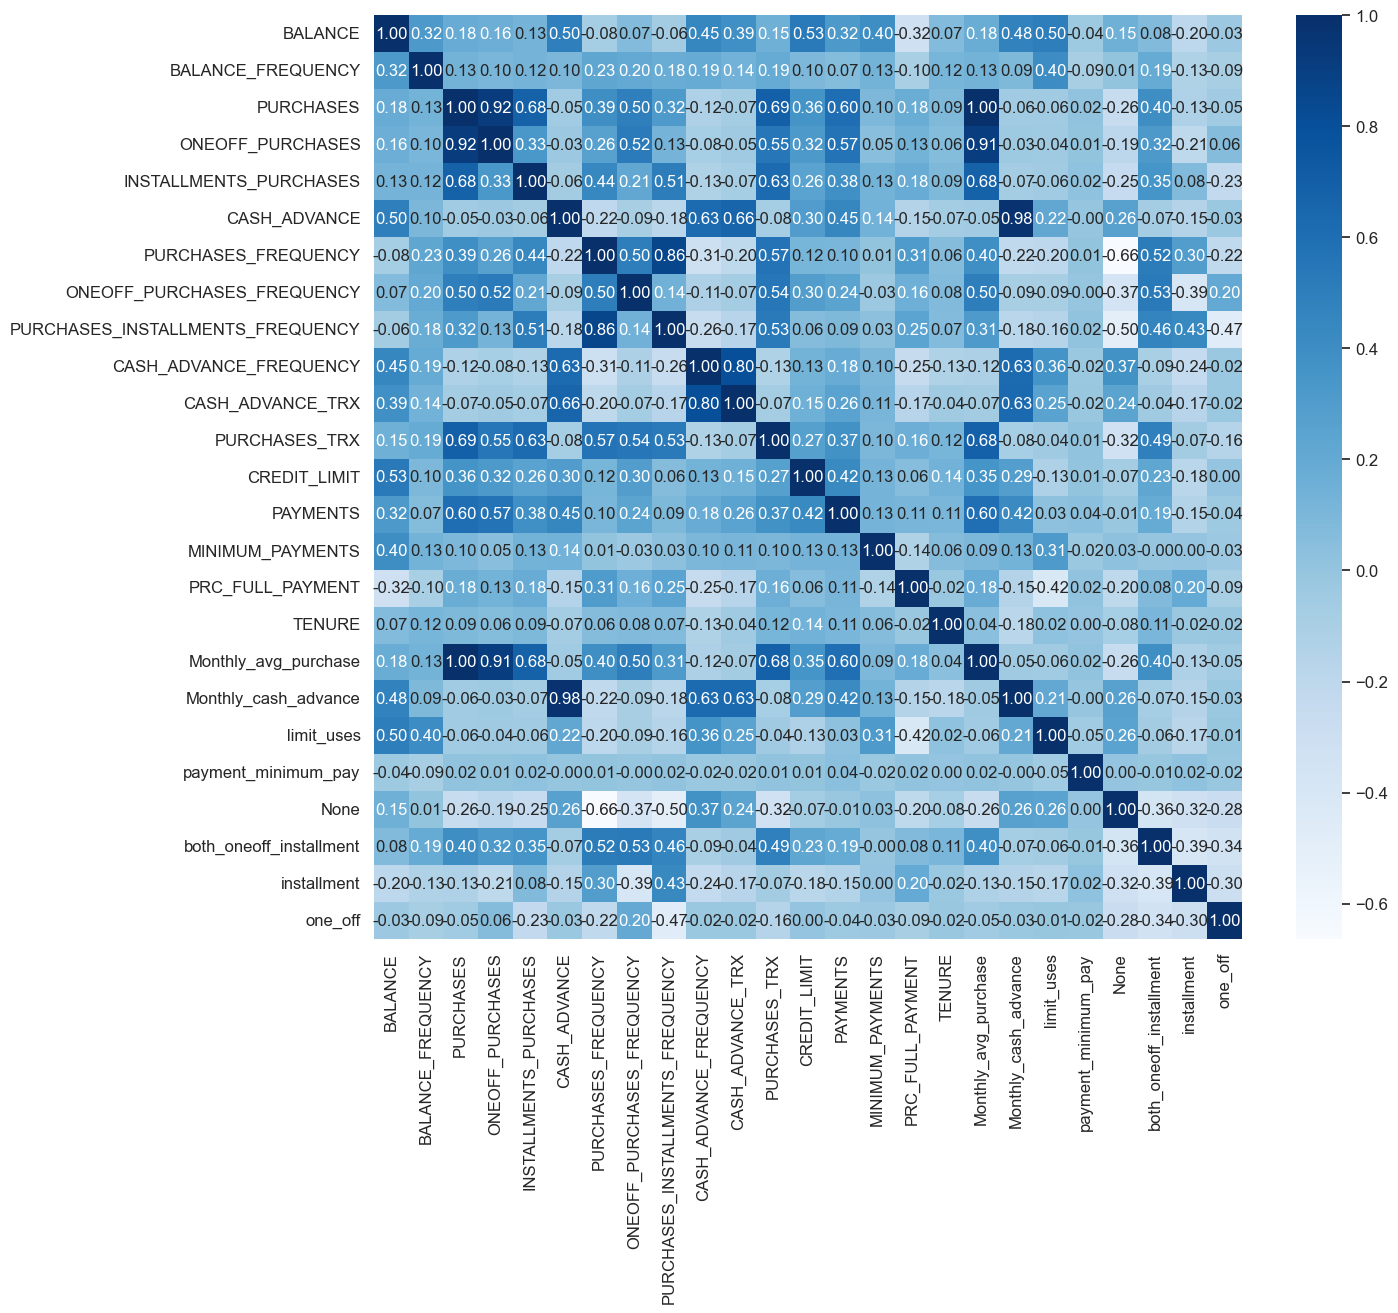

In [70]:
plt.figure(figsize=(14, 12))
sns.heatmap(df_final.corr(), cmap="Blues", annot=True, fmt=".2f")
plt.show()


### Before applying PCA we will standardize data to avoid effect of scale on our result. Centering and Scaling will make all features with equal weight.

### Standardrizing data

#### To put data on the same scale

In [77]:
from sklearn.preprocessing import  StandardScaler
from sklearn.decomposition import PCA

In [72]:
sc=StandardScaler()

In [74]:
df_final.shape

(8950, 25)

In [78]:
df_scaled=sc.fit_transform(df_final)

In [79]:
pca = PCA()
pca.fit(df_scaled)

PCA()

In [80]:
pca.components_.shape

(25, 25)

In [83]:
# to find best k 
k = 0
total = sum(pca.explained_variance_)
currentsum = 0
while currentsum/total <0.99:
    currentsum += pca.explained_variance_[k]
    k+=1

k

19

In [85]:
pca = PCA(n_components=k,whiten=True)
transformed_data = pca.fit_transform(df_scaled)
transformed_data.shape

(8950, 19)

In [86]:
pca.explained_variance_

array([6.06 , 4.599, 2.176, ..., 0.249, 0.213, 0.179])

In [88]:
var = pca.explained_variance_ratio_
var

array([0.242, 0.184, 0.087, ..., 0.01 , 0.009, 0.007])

In [89]:
dimensions = pd.DataFrame(transformed_data)
dimensions.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.571418,-0.934138,-0.184787,-0.346925,0.714817,0.355560,0.066216,-0.205717,-0.491179,-0.835516,-0.282116,-0.392089,-0.515145,-0.916882,0.119444,-0.681688,0.685630,2.707511,-1.070067
1,-0.882902,1.497005,-0.154576,-1.021184,0.282132,-0.412990,1.104469,-0.581915,0.042774,0.804571,-0.218374,-1.556249,1.347850,-0.035373,0.917424,-1.190920,0.131285,-0.412827,-0.052143
2,0.292472,-0.168017,1.416646,0.950818,-1.398658,1.621779,0.146497,0.121145,-0.055932,0.724999,-0.839501,0.148808,-0.130712,-0.079847,1.902467,1.068758,2.418525,-0.784360,-0.312855
3,-0.315968,-0.154258,1.660342,-0.174640,0.165957,1.219718,0.387752,-0.053221,0.312589,-0.780397,-0.535484,0.774218,-0.271238,-0.040722,-0.726279,-1.095460,-0.720195,-0.753725,0.752690
4,-0.673860,-0.386563,1.158430,0.921694,0.019580,0.936409,-0.441729,0.097720,-0.852421,-0.230176,0.003470,-0.199840,1.346613,-0.079490,-0.747660,-0.214473,-0.815090,0.329437,0.264547


# Clustering model(k-means)

In [91]:
from sklearn.cluster import KMeans

In [92]:
km_3 = KMeans(n_clusters=3, random_state=123)
km_3.fit(dimensions)

KMeans(n_clusters=3, random_state=123)

In [93]:
km_4 = KMeans(n_clusters=4, random_state=123).fit(dimensions)
km_5 = KMeans(n_clusters=5, random_state=123).fit(dimensions)
km_6 = KMeans(n_clusters=6, random_state=123).fit(dimensions)
km_7 = KMeans(n_clusters=7, random_state=123).fit(dimensions)
km_8 = KMeans(n_clusters=8, random_state=123).fit(dimensions)
km_9 = KMeans(n_clusters=9, random_state=123).fit(dimensions)

In [94]:
# save the cluster labels and sort by cluster
df_final['cluster_3'] = km_3.labels_
df_final['cluster_4'] = km_4.labels_
df_final['cluster_5'] = km_5.labels_
df_final['cluster_6'] = km_6.labels_
df_final['cluster_7'] = km_7.labels_
df_final['cluster_8'] = km_8.labels_
df_final['cluster_9'] = km_9.labels_

In [96]:
df_final.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_uses,payment_minimum_pay,None,both_oneoff_installment,installment,one_off,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,0.040901,1.446508,0,0,1,0,0,0,1,3,1,1,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,0.457495,3.826241,1,0,0,0,2,1,0,1,3,7,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,0.332687,0.991682,0,0,0,1,2,2,4,2,4,0,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,124.916667,17.149001,0.222223,0.000000,0,0,0,1,2,2,4,2,4,3,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,0.681429,2.771075,0,0,0,1,2,2,4,2,4,3,3


### Segment Size check

In [97]:
df_final['cluster_3'].value_counts()

2    3919
1    2774
0    2257
Name: cluster_3, dtype: int64

In [98]:
df_final['cluster_3'].value_counts()/sum(df_final['cluster_3'].value_counts())

2    0.437877
1    0.309944
0    0.252179
Name: cluster_3, dtype: float64

In [99]:
df_final['cluster_4'].value_counts()/sum(df_final['cluster_4'].value_counts())

3    0.310279
0    0.252179
1    0.228156
2    0.209385
Name: cluster_4, dtype: float64

In [100]:
df_final['cluster_5'].value_counts()/sum(df_final['cluster_5'].value_counts())

3    0.297989
1    0.232291
0    0.206816
4    0.193966
2    0.068939
Name: cluster_5, dtype: float64

In [101]:
df_final['cluster_6'].value_counts()/sum(df_final['cluster_6'].value_counts())

4    0.298436
1    0.206816
2    0.193966
5    0.132626
3    0.100112
0    0.068045
Name: cluster_6, dtype: float64

### Quantitative Evaluation

# 1. Silhouette Coefficient(Higher the better)


### from sklearn import  metrics

In [103]:
from sklearn import  metrics
metrics.silhouette_score(dimensions, labels=km_3.labels_)
k_range = range(2, 16)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=123)
    km.fit(dimensions)
    scores.append(metrics.silhouette_score(dimensions, labels=km.labels_))

In [104]:
scores

[0.07894308848224563,
 0.11249472206721267,
 0.14391773539983857,
 0.1455906921249128,
 0.14473517805820033,
 0.14943266437267036,
 0.167091415902243,
 0.1657113550402823,
 0.16314353558266623,
 0.17463273361042755,
 0.1663945203250409,
 0.16521169473066777,
 0.17426618885683232,
 0.18089484495072183]

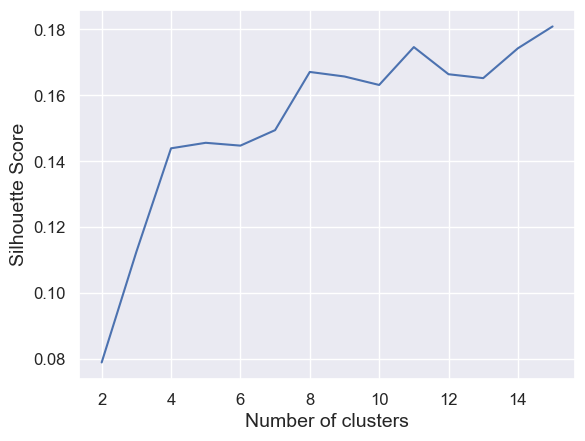

In [106]:
plt.plot( k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid('True')

2. Elbow Analysis

In [107]:
cluster_range= range(2, 20)
errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit(dimensions)
    errors.append(clusters.inertia_)

In [108]:
errors

[161087.83814862266,
 152140.99728360478,
 145648.54281764608,
 138390.75381042168,
 132045.4868762396,
 127159.39022184054,
 121182.55575190374,
 119080.71353698644,
 113168.37003352493,
 108766.63334712647,
 105786.975972016,
 101623.78215643161,
 98186.8514536686,
 96310.71543226349,
 92832.25405816382,
 89069.96546463016,
 87178.25721247315,
 84298.46520067485]

In [109]:
clusters_df = pd.DataFrame({'Cluster_no' : range(2, 20), 'Unexpalined_variance' : errors})
clusters_df[0:10]

,Cluster_no,Unexpalined_variance
0,2,161087.838149
1,3,152140.997284
2,4,145648.542818
3,5,138390.753810
4,6,132045.486876
5,7,127159.390222
6,8,121182.555752
7,9,119080.713537
8,10,113168.370034
9,11,108766.633347


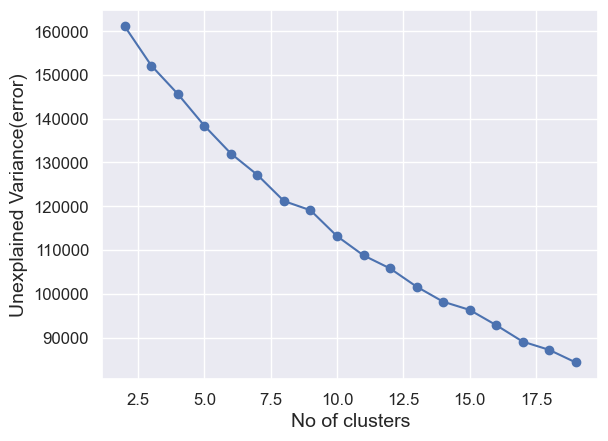

In [110]:
%matplotlib inline
plt.plot(clusters_df.Cluster_no, clusters_df.Unexpalined_variance, marker = 'o')
plt.xlabel('No of clusters')
plt.ylabel('Unexplained Variance(error)')
plt.grid('True')

Qualitative Analysis(Profiling)

In [111]:
df_final.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_uses,payment_minimum_pay,None,both_oneoff_installment,installment,one_off,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,0.040901,1.446508,0,0,1,0,0,0,1,3,1,1,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,0.457495,3.826241,1,0,0,0,2,1,0,1,3,7,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,0.332687,0.991682,0,0,0,1,2,2,4,2,4,0,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,124.916667,17.149001,0.222223,0.000000,0,0,0,1,2,2,4,2,4,3,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,0.681429,2.771075,0,0,0,1,2,2,4,2,4,3,3


In [112]:
size = pd.concat([pd.Series(df_final.cluster_3.size), pd.Series(df_final.cluster_3.value_counts()).sort_index(), pd.Series(df_final.cluster_4.value_counts()).sort_index(),
          pd.Series(df_final.cluster_5.value_counts()).sort_index(), pd.Series(df_final.cluster_6.value_counts()).sort_index(), pd.Series(df_final.cluster_7.value_counts()).sort_index(),
          pd.Series(df_final.cluster_8.value_counts()).sort_index(), pd.Series(df_final.cluster_9.value_counts()).sort_index()])
size

0    8950
0    2257
1    2774
2    3919
0    2257
1    2042
2    1874
3    2777
0    1851
1    2079
2     617
3    2667
4    1736
0     609
1    1851
2    1736
3     896
4    2671
5    1187
0     603
1    2067
2    2592
3    1798
4    1714
5       3
6     173
0     917
1    2226
2    1940
3    1533
4       3
5    1904
6     223
7     204
0     853
1    1996
2    1680
3    1365
4       3
5    1774
6     166
7     500
8     613
dtype: int64

In [114]:
Seg_size = pd.DataFrame(size, columns=['seg_size'])
Seg_pct = pd.DataFrame(size/df_final.cluster_3.size, columns= ['Seg_pct'])

In [115]:
pd.concat([Seg_size.T, Seg_pct.T], axis = 0)

,0,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5,0,1,2,3,4,5,6,0,1,2,3,4,5,6,7,0,1,2,3,4,5,6,7,8
seg_size,8950.0,2257.000000,2774.000000,3919.000000,2257.000000,2042.000000,1874.000000,2777.000000,1851.000000,2079.000000,617.000000,2667.000000,1736.000000,609.000000,1851.000000,1736.000000,896.000000,2671.000000,1187.000000,603.000000,2067.00000,2592.000000,1798.000000,1714.000000,3.000000,173.00000,917.000000,2226.000000,1940.00000,1533.000000,3.000000,1904.000000,223.000000,204.000000,853.000000,1996.000000,1680.000000,1365.000000,3.000000,1774.000000,166.000000,500.000000,613.000000
Seg_pct,1.0,0.252179,0.309944,0.437877,0.252179,0.228156,0.209385,0.310279,0.206816,0.232291,0.068939,0.297989,0.193966,0.068045,0.206816,0.193966,0.100112,0.298436,0.132626,0.067374,0.23095,0.289609,0.200894,0.191508,0.000335,0.01933,0.102458,0.248715,0.21676,0.171285,0.000335,0.212737,0.024916,0.022793,0.095307,0.223017,0.187709,0.152514,0.000335,0.198212,0.018547,0.055866,0.068492


In [116]:
Profiling_output = pd.concat([df_final.apply(lambda x: x.mean()).T, df_final.groupby('cluster_3').apply(lambda x : x.mean()).T,
                             df_final.groupby('cluster_4').apply(lambda x : x.mean()).T, df_final.groupby('cluster_5').apply(lambda x : x.mean()).T, 
                             df_final.groupby('cluster_6').apply(lambda x : x.mean()).T, df_final.groupby('cluster_7').apply(lambda x : x.mean()).T,
                             df_final.groupby('cluster_8').apply(lambda x : x.mean()).T, df_final.groupby('cluster_9').apply(lambda x : x.mean()).T], axis =1)


In [117]:
Profiling_output

,0,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5,0,1,2,3,4,5,6,0,1,2,3,4,5,6,7,0,1,2,3,4,5,6,7,8
BALANCE,1564.474828,846.400844,1805.968182,1807.085293,846.400844,2147.759969,1438.761601,1804.017971,2226.402797,865.089478,1117.023587,1822.822884,1458.401451,1071.296200,2228.859227,1458.401451,981.727753,1820.727088,799.862558,1061.689351,848.794310,1725.890819,2184.315303,1428.933376,0.722441,4377.406348,1512.531138,787.071661,2016.369668,1368.897631,0.722441,1558.025137,3863.434255,5023.196290,1259.817161,608.580498,1712.796329,1162.877935,0.722441,1253.823085,3508.359996,7580.800643,1061.664573
BALANCE_FREQUENCY,0.877271,0.823061,0.945825,0.859966,0.823061,0.882385,0.836331,0.945196,0.897039,0.820068,0.798024,0.949335,0.842151,0.794983,0.897088,0.842151,0.699041,0.948688,0.913779,0.793809,0.820827,0.948414,0.901701,0.844156,0.363636,0.859743,0.977391,0.820958,0.882284,0.807699,0.363636,0.928917,0.994252,0.914475,0.980965,0.813877,0.888079,0.806186,0.363636,0.928976,0.987897,0.995693,0.794395
PURCHASES,1003.204834,536.646952,2267.805807,376.774121,536.646952,0.000000,786.759029,2266.145002,0.000000,553.306570,455.323063,2313.012700,794.135772,463.701839,0.000000,794.135772,385.654900,2305.819274,685.155072,453.143516,546.048355,2015.919421,0.000000,757.545840,730.453333,6074.379769,2269.982301,522.478212,0.000000,611.910998,730.453333,1428.117589,8516.878475,859.913137,2311.213048,532.020386,0.000000,579.714359,730.453333,1455.413100,10145.668072,1203.787460,463.012904
ONEOFF_PURCHASES,592.437371,0.000000,1379.884427,376.247785,0.000000,0.000000,786.827679,1378.393734,0.000000,0.000000,273.550178,1407.868639,794.209879,276.761675,0.000000,794.209879,0.085033,1405.818821,0.000000,272.685307,0.000000,1193.732720,0.000000,757.620898,0.000000,4307.328324,1764.863915,0.000000,0.000000,611.994918,0.000000,720.101113,5610.614843,605.423627,1804.024033,0.000000,0.000000,579.808608,0.000000,730.484307,6862.406807,730.459520,280.219853
INSTALLMENTS_PURCHASES,411.067645,537.622499,888.049776,0.559163,537.622499,0.000000,0.000000,887.879525,0.000000,554.351212,181.821507,905.277608,0.000000,186.989425,0.000000,0.000000,386.351953,900.133800,686.394381,180.507960,547.088418,822.324113,0.000000,0.000000,730.453333,1767.178613,505.118386,523.197803,0.000000,0.000000,730.453333,708.203540,2908.954215,254.489510,507.189015,533.074925,0.000000,0.000000,730.453333,725.129566,3283.261265,473.461840,182.841990
CASH_ADVANCE,978.871112,420.517242,764.226676,1452.366482,420.517242,1988.467370,870.530348,763.401080,1965.273925,391.008272,1419.110704,732.501899,853.164950,1352.858452,1966.569667,853.164950,517.608051,732.850218,332.410368,1342.574536,352.044261,587.296724,1756.326436,772.209590,0.000000,7051.637256,469.491695,326.326980,1583.295261,725.810419,0.000000,613.879504,721.330150,10245.222234,415.323412,269.053848,1671.029141,732.387790,0.000000,634.936053,948.797401,3830.446981,1408.573246
PURCHASES_FREQUENCY,0.490351,0.694580,0.799116,0.154178,0.694580,0.000163,0.321001,0.799093,0.000180,0.684004,0.444702,0.800226,0.321241,0.443588,0.000180,0.321241,0.361429,0.800109,0.926328,0.439180,0.684777,0.797252,0.000185,0.322770,0.777778,0.497145,0.928893,0.693403,0.000172,0.210815,0.777778,0.731627,0.979508,0.274670,0.934191,0.686398,0.000198,0.202109,0.777778,0.735588,0.964440,0.419585,0.437770
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.000000,0.436502,0.153391,0.000000,0.000000,0.320779,0.436031,0.000000,0.000000,0.137130,0.438743,0.321001,0.138566,0.000000,0.321001,0.000186,0.438107,0.000000,0.136786,0.000000,0.431338,0.000000,0.322527,0.000000,0.339159,0.880800,0.000000,0.000000,0.210544,0.000000,0.259362,0.729239,0.123010,0.891232,0.000000,0.000000,0.201804,0.000000,0.262888,0.742406,0.208814,0.134264
PURCHASES_INSTALLMENTS_FREQUENCY,0.364437,0.658320,0.639229,0.000680,0.658320,0.000163,0.000000,0.639378,0.000180,0.655617,0.299706,0.642458,0.000000,0.297782,0.000180,0.000000,0.326373,0.642515,0.902650,0.294371,0.656171,0.639326,0.000185,0.000000,0.777778,0.

In [118]:
Profiling_output_final=pd.concat([Seg_size.T, Seg_pct.T, Profiling_output], axis=0)
Profiling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8',
                                'KM9_1', 'KM9_2', 'KM9_3', 'KM9_4', 'KM9_5','KM9_6','KM9_7','KM9_8', 'KM9_9']

In [119]:
Profiling_output_final

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,KM5_3,KM5_4,KM5_5,KM6_1,KM6_2,KM6_3,KM6_4,KM6_5,KM6_6,KM7_1,KM7_2,KM7_3,KM7_4,KM7_5,KM7_6,KM7_7,KM8_1,KM8_2,KM8_3,KM8_4,KM8_5,KM8_6,KM8_7,KM8_8,KM9_1,KM9_2,KM9_3,KM9_4,KM9_5,KM9_6,KM9_7,KM9_8,KM9_9
seg_size,8950.000000,2257.000000,2774.000000,3919.000000,2257.000000,2042.000000,1874.000000,2777.000000,1851.000000,2079.000000,617.000000,2667.000000,1736.000000,609.000000,1851.000000,1736.000000,896.000000,2671.000000,1187.000000,603.000000,2067.000000,2592.000000,1798.000000,1714.000000,3.000000,173.000000,917.000000,2226.000000,1940.000000,1533.000000,3.000000,1904.000000,223.000000,204.000000,853.000000,1996.000000,1680.000000,1365.000000,3.000000,1774.000000,166.000000,500.000000,613.000000
Seg_pct,1.000000,0.252179,0.309944,0.437877,0.252179,0.228156,0.209385,0.310279,0.206816,0.232291,0.068939,0.297989,0.193966,0.068045,0.206816,0.193966,0.100112,0.298436,0.132626,0.067374,0.230950,0.289609,0.200894,0.191508,0.000335,0.019330,0.102458,0.248715,0.216760,0.171285,0.000335,0.212737,0.024916,0.022793,0.095307,0.223017,0.187709,0.152514,0.000335,0.198212,0.018547,0.055866,0.068492
BALANCE,1564.474828,846.400844,1805.968182,1807.085293,846.400844,2147.759969,1438.761601,1804.017971,2226.402797,865.089478,1117.023587,1822.822884,1458.401451,1071.296200,2228.859227,1458.401451,981.727753,1820.727088,799.862558,1061.689351,848.794310,1725.890819,2184.315303,1428.933376,0.722441,4377.406348,1512.531138,787.071661,2016.369668,1368.897631,0.722441,1558.025137,3863.434255,5023.196290,1259.817161,608.580498,1712.796329,1162.877935,0.722441,1253.823085,3508.359996,7580.800643,1061.664573
BALANCE_FREQUENCY,0.877271,0.823061,0.945825,0.859966,0.823061,0.882385,0.836331,0.945196,0.897039,0.820068,0.798024,0.949335,0.842151,0.794983,0.897088,0.842151,0.699041,0.948688,0.913779,0.793809,0.820827,0.948414,0.901701,0.844156,0.363636,0.859743,0.977391,0.820958,0.882284,0.807699,0.363636,0.928917,0.994252,0.914475,0.980965,0.813877,0.888079,0.806186,0.363636,0.928976,0.987897,0.995693,0.794395
PURCHASES,1003.204834,536.646952,2267.805807,376.774121,536.646952,0.000000,786.759029,2266.145002,0.000000,553.306570,455.323063,2313.012700,794.135772,463.701839,0.000000,794.135772,385.654900,2305.819274,685.155072,453.143516,546.048355,2015.919421,0.000000,757.545840,730.453333,6074.379769,2269.982301,522.478212,0.000000,611.910998,730.453333,1428.117589,8516.878475,859.913137,2311.213048,532.020386,0.000000,579.714359,730.453333,1455.413100,10145.668072,1203.787460,463.012904
ONEOFF_PURCHASES,592.437371,0.000000,1379.884427,376.247785,0.000000,0.000000,786.827679,1378.393734,0.000000,0.000000,273.550178,1407.868639,794.209879,276.761675,0.000000,794.209879,0.085033,1405.818821,0.000000,272.685307,0.000000,1193.732720,0.000000,757.620898,0.000000,4307.328324,1764.863915,0.000000,0.000000,611.994918,0.000000,720.101113,5610.614843,605.423627,1804.024033,0.000000,0.000000,579.808608,0.000000,730.484307,6862.406807,730.459520,280.219853
INSTALLMENTS_PURCHASES,411.067645,537.622499,888.049776,0.559163,537.622499,0.000000,0.000000,887.879525,0.000000,554.351212,181.821507,905.277608,0.000000,186.989425,0.000000,0.000000,386.351953,900.133800,686.394381,180.507960,547.088418,822.324113,0.000000,0.000000,730.453333,1767.178613,505.118386,523.197803,0.000000,0.000000,730.453333,708.203540,2908.954215,254.489510,507.189015,533.074925,0.000000,0.000000,730.453333,725.129566,3283.261265,473.461840,182.841990
CASH_ADVANCE,978.871112,420.517242,764.226676,1452.366482,420.517242,1988.467370,870.530348,763.401080,1965.273925,391.008272,1419.110704,732.501899,853.164950,1352.858452,1966.569667,853.164950,517.608051,732.850218,332.410368,1342.574536,352.044261,587.296724,1756.326436,772.209590,0.000000,7051.637256,469.491695,326.326980,1583.295261,725.810419,0.000000,613.879504,721.330150,10245.222234,415.323412,269.053848,1671.029141,732.387790,0.000000,634.936053,948.797401,3830.446981,1408.573246
PURCHASE

In [120]:
Profiling_output_final.to_csv('Profiling_output.csv')